In [22]:
from google.cloud import storage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
from os import listdir
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from collections import Counter

In [2]:
# !gsutil ls gs://dog-breed-classification/valid/Affenpinscher_00038.jpg

In [3]:
test_images_path = sorted(listdir('images/test'))
train_images_path = sorted(listdir('images/train'))
valid_images_path = sorted(listdir('images/valid'))

In [4]:
for i in test_images_path:
    if "ipynb_" in i:
        idx = test_images_path.index(i)
        test_images_path.pop(idx)
        print("Deleted item in test", i)

for i in train_images_path:
    if "ipynb_" in i:
        idx = train_images_path.index(i)
        train_images_path.pop(idx)
        print("Deleted item in train", i)
        
for i in valid_images_path:
    if "ipynb_" in i:
        idx = valid_images_path.index(i)
        valid_images_path.pop(idx)
        print("Deleted item in validation", i)

Deleted item in test .ipynb_checkpoints
Deleted item in train .ipynb_checkpoints


In [5]:
train_images_path[5255]

'Leonberger_06571.jpg'

In [6]:
img_width = 350
img_height = 350

train_images = []

for i in tqdm(train_images_path):
    path = 'images/train/' + i
    img = image.load_img(path, target_size=(img_width, img_height, 3))
    img = image.img_to_array(img)
    img = img/255.0
    train_images.append(img)
    
train_images = np.array(train_images)    

100%|██████████| 6680/6680 [01:31<00:00, 72.88it/s] 


In [7]:
train_images.shape

(6680, 350, 350, 3)

In [ ]:
# train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
# test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

In [ ]:
# train_images = tf.convert_to_tensor(
#     train_images, dtype=tf.float16)

In [8]:
img_width = 350
img_height = 350

valid_images = []

for i in tqdm(valid_images_path):
    path = 'images/valid/' + i
    img = image.load_img(path, target_size=(img_width, img_height, 3))
    img = image.img_to_array(img)
    img = img/255.0
    valid_images.append(img)
    
valid_images = np.array(valid_images)
# valid_images = tf.convert_to_tensor(
#     valid_images, dtype=tf.float16)

100%|██████████| 835/835 [00:09<00:00, 89.58it/s] 


In [9]:
valid_images.shape

(835, 350, 350, 3)

In [10]:
img_width = 350
img_height = 350

test_images = []

for i in tqdm(test_images_path):
    path = 'images/test/' + i
    img = image.load_img(path, target_size=(img_width, img_height, 3))
    img = image.img_to_array(img)
    img = img/255.0
    test_images.append(img)

test_images = np.array(test_images)

# test_images = tf.convert_to_tensor(
#     test_images, dtype=tf.float16)  

100%|██████████| 836/836 [00:08<00:00, 94.52it/s] 


In [11]:
test_images.shape

(836, 350, 350, 3)

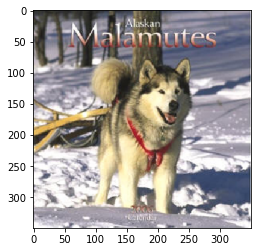

In [12]:
plt.imshow(valid_images[30])

In [ ]:
plt.imshow(test_images[0])

In [ ]:
plt.imshow(test_images[2])

In [ ]:
plt.imshow(train_images[2])

In [19]:
train_csv = pd.read_csv('ml-ops/breeds/train.txt')
valid_csv = pd.read_csv('ml-ops/breeds/valid.txt')
test_csv = pd.read_csv('ml-ops/breeds/test.txt')

In [21]:
print("Unique breeds in training set:", len(set(list(train_csv.breed))))
print("Unique breeds in training set:", len(set(list(valid_csv.breed))))
print("Unique breeds in training set:", len(set(list(test_csv.breed))))

Unique breeds in training set: 133
Unique breeds in training set: 133
Unique breeds in training set: 133


In [24]:
train_dict = Counter(list(train_csv.breed))
valid_dict = Counter(list(valid_csv.breed))
test_dict = Counter(list(test_csv.breed))

### Get Index for each class in Classes dataset

In [107]:
classes = pd.DataFrame(sorted(set(list(train_csv.breed))), columns=['breed'])

In [108]:
classes.reset_index(inplace=True)
classes.columns = ['class_id', 'breed']
classes.head(5)

,class_id,breed
0,0,Affenpinscher
1,1,Afghan_hound
2,2,Airedale_terrier
3,3,Akita
4,4,Alaskan_malamute


In [109]:
classes.columns, len(classes)

(Index(['class_id', 'breed'], dtype='object'), 133)

In [49]:
train_csv.head(5)

,ids,breed
0,1,Affenpinscher
1,2,Affenpinscher
2,4,Affenpinscher
3,5,Affenpinscher
4,6,Affenpinscher


## Get Train dataset with classes, X_train and y_train

In [104]:
train_with_classes = pd.merge(train_csv, classes, on='breed')
train_with_classes.columns = ['ids', 'breed', 'class_id']
train_with_classes.tail(10)

,ids,breed,class_id
6670,8340,Yorkshire_terrier,132
6671,8341,Yorkshire_terrier,132
6672,8342,Yorkshire_terrier,132
6673,8343,Yorkshire_terrier,132
6674,8344,Yorkshire_terrier,132
6675,8345,Yorkshire_terrier,132
6676,8347,Yorkshire_terrier,132
6677,8349,Yorkshire_terrier,132
6678,8350,Yorkshire_terrier,132
6679,8351,Yorkshire_terrier,132


### List of breeds only in training dataset

In [78]:
y_train = sorted(list(train_csv.breed))
len(y_train)

6680

## Get Validation dataset with classes, X_valid and y_valid

In [105]:
valid_with_classes = pd.merge(valid_csv, classes, on='breed')
valid_with_classes.columns = ['ids', 'breed', 'class_id']
valid_with_classes.head(10)

,ids,breed,class_id
0,38,Affenpinscher,0
1,40,Affenpinscher,0
2,41,Affenpinscher,0
3,42,Affenpinscher,0
4,49,Affenpinscher,0
5,55,Affenpinscher,0
6,68,Affenpinscher,0
7,74,Affenpinscher,0
8,95,Afghan_hound,1
9,100,Afghan_hound,1


### List of breeds only in validation dataset

In [79]:
y_valid = sorted(list(valid_csv.breed))
len(y_valid)

835

## Get Test dataset with classes, X_test and y_test

In [106]:
test_with_classes = pd.merge(test_csv, classes, on='breed')
test_with_classes.columns = ['ids', 'breed', 'class_id']
test_with_classes.head(10)

,ids,breed,class_id
0,3,Affenpinscher,0
1,23,Affenpinscher,0
2,36,Affenpinscher,0
3,47,Affenpinscher,0
4,48,Affenpinscher,0
5,58,Affenpinscher,0
6,71,Affenpinscher,0
7,78,Affenpinscher,0
8,116,Afghan_hound,1
9,125,Afghan_hound,1


### List of breeds only in testing dataset

In [81]:
y_test = sorted(list(test_csv.breed))
len(y_test)

836

In [124]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,5))
    plt.imshow(X[index])
    plt.xlabel(y[index])

## sample training plot

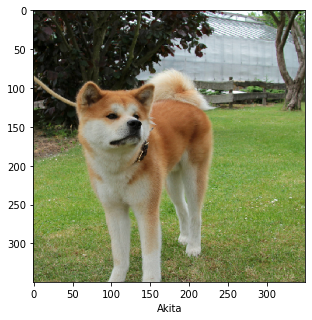

In [129]:
plot_sample(train_images, y_train, 200)

### sample validation plot

In [ ]:
plot_sample(_images, y_train, 200)